# U235 Mode Comparison

In [5]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import os
from statistics import *
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import sympy as sym
from sympy.interactive import printing
printing.init_printing(use_latex = 'mathjax')
from IPython.display import display, Math, Latex
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.pyplot import cm
import pylab as pl
%matplotlib inline

In [6]:
### rcParams are the default parameters for matplotlib
import matplotlib as mpl

print ("Matplotbib Version: ", mpl.__version__)

mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Helvetica', 'serif'
#mpl.rcParams['font.color'] = 'darkred'
mpl.rcParams['font.weight'] = 'normal'

mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 12.
mpl.rcParams['ytick.labelsize'] = 12.
mpl.rcParams['lines.linewidth'] = 2.

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 12,
        }

mpl.rcParams['xtick.major.pad']='10'
mpl.rcParams['ytick.major.pad']='10'

mpl.rcParams['image.cmap'] = 'inferno'

Matplotbib Version:  2.0.2


In [7]:
# functions to gather data

# experimental data range (inclusive)
# A :     [61 180]    -- 120
# TKE :   [111 230]   -- 120

# fit (s1, s2, sl, sum) range (inclusive)
# A :     [0 255]     -- 256
# TKE :   [111 238]   -- 128

# I am using experimental data range as it is smaller and will tighten the data window (avoid 0's)

# easy one
def get_exp_data():
    f=open(os.path.join(os.getcwd(),'tkm0.5_exp.mtx'),"r")
    lines=f.readlines()
    YATKE_exp=[]
    for x in lines:
        x = x.split()
        for y in range(len(x)):
            if len(x) != 0:
                YATKE_exp.append(x[y])
    f.close()
    # eliminate header
    
    # change strings ',' to '.'
    for i in range(len(YATKE_exp)): 
        YATKE_exp[i] = YATKE_exp[i].replace(',', '.')
    
    for i in range(5): YATKE_exp.pop(0)
        
    #convert from strings to floats
    YATKE_exp = list(map(float, YATKE_exp))
    
    return YATKE_exp



# hard one
def get_modal_data(instr):
    f=open(os.path.join(os.getcwd(),'tkm0.5-' + instr +'.dat'),"r")
    lines=f.readlines()
    YATKE_mode=[]
    for x in lines:
        x = x.split()
        for y in range(len(x)):
            if len(x) != 0:
                YATKE_mode.append(x[y])
    f.close()
    
    # eliminate header
    for i in range(5): YATKE_mode.pop(0)
        
    # shave off unnecessary data
    # first the excess TKE values
    for i in range(256): 
        for j in range(8): YATKE_mode.pop(120 * (i+1))
    
    # shave off A = 0 - 60
    for i in range(61 * 120): YATKE_mode.pop(0)
        
    #shave off A = 181 - 255
    for i in range(75 * 120): YATKE_mode.pop(120*120)
        
    #convert from strings to floats
    YATKE_mode = list(map(float, YATKE_mode))
    
    return YATKE_mode

def rearrange(YATKE):
    return np.transpose(np.asarray(YATKE).reshape(120, 120))

def YATKEplot(YATKE):
    fig, axes = pl.subplots(1, 1, figsize=(15, 10))
    c1 = plt.imshow(YATKE, extent=[61,180, 111,230], origin="lower")
    plt.xlabel('A')
    plt.ylabel('TKE')
    plt.colorbar(fraction=0.03, pad=0.04)


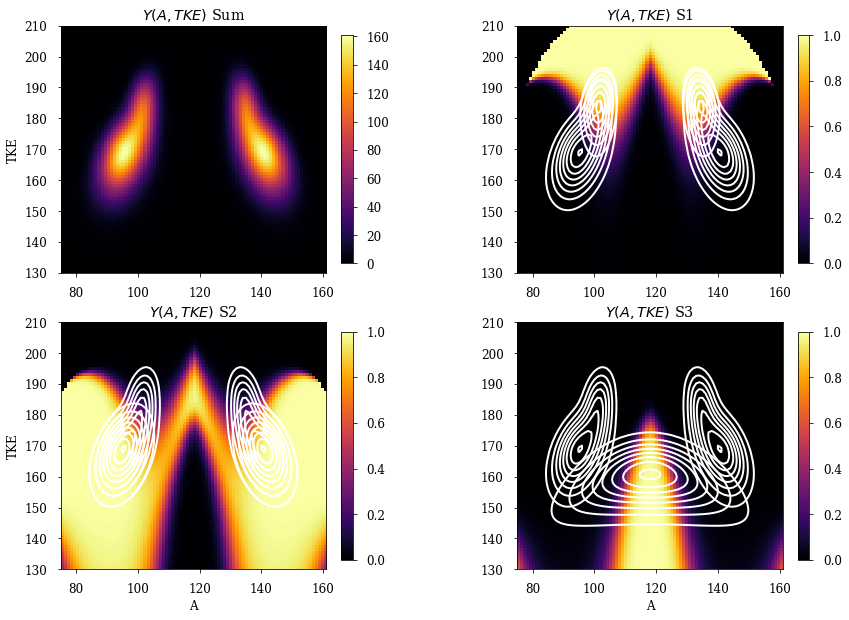

In [8]:
# YATKE Contribution plot from each mode

YATKE_exp = get_exp_data()
YATKE_s1 = get_modal_data('s1')
YATKE_s2 = get_modal_data('s2')
YATKE_sl = get_modal_data('sl')
YATKE_sum = get_modal_data('sum')

A = np.linspace(61,180,120)
TKE = np.linspace(111,230, 120)

ratioS1 = np.zeros(len(YATKE_sum))
ratioS2 = np.zeros(len(YATKE_sum))
ratioSL = np.zeros(len(YATKE_sum))

for i in range(len(YATKE_sum)):
    if YATKE_sum[i] != 0:
        ratioS1[i] = YATKE_s1[i] / YATKE_sum[i]
        ratioS2[i] = YATKE_s2[i] / YATKE_sum[i]
        ratioSL[i] = YATKE_sl[i] / YATKE_sum[i]

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(221)
c1 = plt.imshow(rearrange(YATKE_sum), extent=[61,180, 111,230], origin="lower")
plt.xlim(75,161)
plt.ylim(130,210)
plt.ylabel('TKE')
plt.colorbar(fraction=0.03, pad=0.04)


ax2 = fig.add_subplot(222)
c1 = plt.imshow(rearrange(ratioS1), extent=[61,180, 111,230], origin="lower")
ax2.contour(A, TKE, rearrange(YATKE_sum), 8, colors='w')
ax2.contour(A, TKE, rearrange(YATKE_s1), 8, colors='w')
plt.xlim(75,161)
plt.ylim(130,210)
plt.colorbar(fraction=0.03, pad=0.04)


ax3 = fig.add_subplot(223)
c1 = plt.imshow(rearrange(ratioS2), extent=[61,180, 111,230], origin="lower")
ax3.contour(A, TKE, rearrange(YATKE_sum), 8, colors='w')
ax3.contour(A, TKE, rearrange(YATKE_s2), 8, colors='w')
plt.xlim(75,161)
plt.ylim(130,210)
plt.xlabel('A')
plt.ylabel('TKE')
plt.colorbar(fraction=0.03, pad=0.04)


ax4 = fig.add_subplot(224)
c1 = plt.imshow(rearrange(ratioSL), extent=[61,180, 111,230], origin="lower")
ax4.contour(A, TKE, rearrange(YATKE_sum), 8, colors='w')
ax4.contour(A, TKE, rearrange(YATKE_sl), 8, colors='w')
plt.xlim(75,161)
plt.ylim(130,210)
plt.xlabel('A')
plt.colorbar(fraction=0.03, pad=0.04)


ax1.title.set_text(r'$Y(A,TKE)$ Sum')
ax2.title.set_text(r'$Y(A,TKE)$ S1')
ax3.title.set_text(r'$Y(A,TKE)$ S2')
ax4.title.set_text(r'$Y(A,TKE)$ S3')
plt.show()

